In [1]:
# %matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, normalize

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering


from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#ignore all warnings
import warnings
warnings.filterwarnings(action= 'ignore')

#set some parameters
mpl.rcParams['figure.figsize'] = [16, 9]

In [7]:
df = pd.read_csv('Country-data.csv')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [47]:
df.select_dtypes(exclude='object').corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


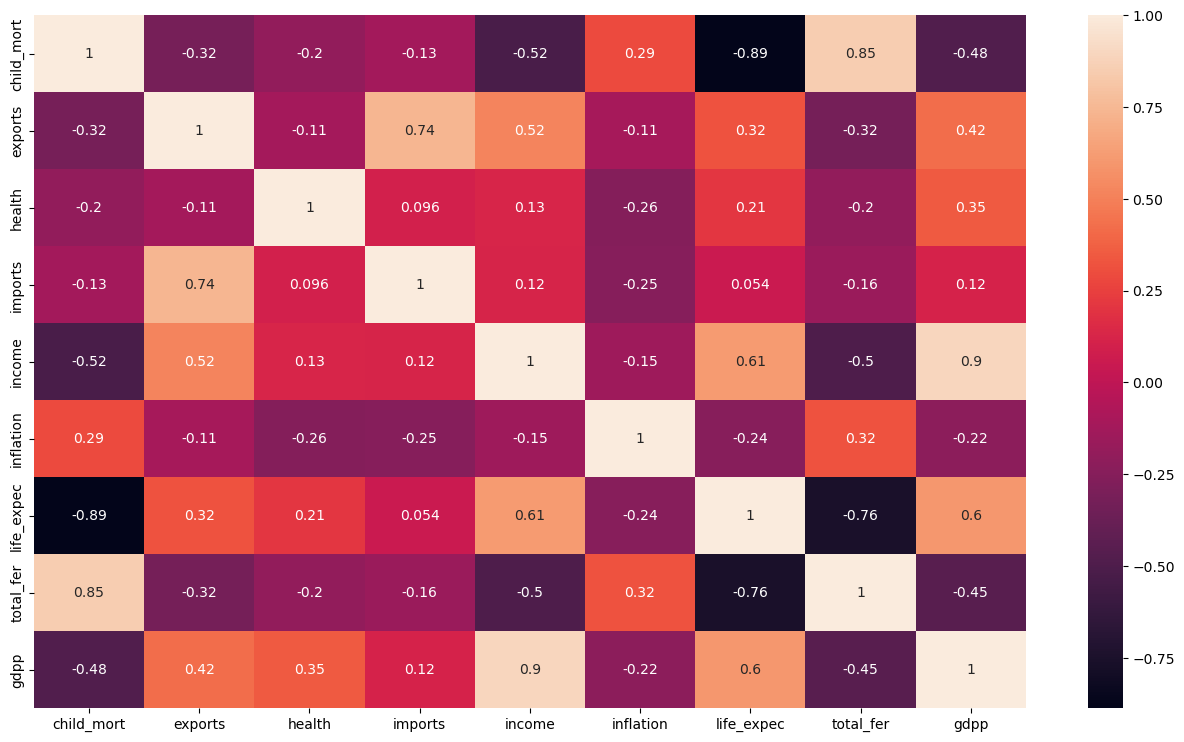

In [51]:
sns.heatmap(data = df.select_dtypes(exclude='object').corr(), annot=True)
plt.show()

In [19]:
X1 = df.select_dtypes(exclude='object')
X = X1.columns
X

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [25]:
X1

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [29]:
standard_scaler = StandardScaler()
scaled_X = standard_scaler.fit_transform(X1)

In [31]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_X)

In [33]:
X_pca

array([[-2.91302459e+00,  9.56205755e-02],
       [ 4.29911330e-01, -5.88155666e-01],
       [-2.85225077e-01, -4.55174413e-01],
       [-2.93242265e+00,  1.69555507e+00],
       [ 1.03357587e+00,  1.36658709e-01],
       [ 2.24072616e-02, -1.77918658e+00],
       [-1.01583737e-01, -5.68251724e-01],
       [ 2.34216461e+00, -1.98845915e+00],
       [ 2.97376366e+00, -7.34688659e-01],
       [-1.81486997e-01, -4.02865873e-01],
       [ 1.26874386e+00, -6.56588363e-01],
       [ 1.67099640e+00,  5.61162493e-01],
       [-1.12385093e+00, -9.61397405e-01],
       [ 1.08137420e+00, -4.81969530e-01],
       [ 5.80025152e-01,  5.35326834e-01],
       [ 3.14378596e+00,  6.63547921e-01],
       [ 2.11255447e-01,  6.99242662e-01],
       [-2.67231388e+00,  4.18172125e-01],
       [-1.56570962e-01,  7.77395617e-01],
       [-7.93851561e-01, -1.20261085e-01],
       [ 9.95867143e-01, -9.71888439e-01],
       [-8.82087639e-01,  4.57368180e-01],
       [ 1.40781361e-01, -2.15107731e+00],
       [ 2.

In [37]:
df1 = pd.DataFrame(data = X_pca, columns = ['first','second'])
df1

,first,second
0,-2.913025,0.095621
1,0.429911,-0.588156
2,-0.285225,-0.455174
3,-2.932423,1.695555
4,1.033576,0.136659
...,...,...
162,-0.820631,0.639570
163,-0.551036,-1.233886
164,0.498524,1.390744
165,-1.887451,-0.109453


In [41]:
df1['country'] = df['country']
df1

,first,second,country
0,-2.913025,0.095621,Afghanistan
1,0.429911,-0.588156,Albania
2,-0.285225,-0.455174,Algeria
3,-2.932423,1.695555,Angola
4,1.033576,0.136659,Antigua and Barbuda
...,...,...,...
162,-0.820631,0.639570,Vanuatu
163,-0.551036,-1.233886,Venezuela
164,0.498524,1.390744,Vietnam
165,-1.887451,-0.109453,Yemen


In [45]:
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Variance Explained:", sum(pca.explained_variance_ratio_))

Explained Variance Ratio: [0.4595174  0.17181626]
Total Variance Explained: 0.6313336543771412


In [53]:
range_n_clusters = [2, 3, 4, 5, 6,7,8,9]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X1)
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.7256314906273207
For n_clusters = 3 The average silhouette_score is : 0.7106457354531156
For n_clusters = 4 The average silhouette_score is : 0.6109297437247547
For n_clusters = 5 The average silhouette_score is : 0.6135729429786736
For n_clusters = 6 The average silhouette_score is : 0.5923323846898451
For n_clusters = 7 The average silhouette_score is : 0.5959257331107111
For n_clusters = 8 The average silhouette_score is : 0.5361006638455612
For n_clusters = 9 The average silhouette_score is : 0.5549111888042847


In [55]:
kmeans = KMeans(n_clusters=3, random_state=42)
df1['cluster'] = kmeans.fit_predict(X_pca)

In [57]:
sil_score = silhouette_score(X_pca, pca_df['cluster'])
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.37860739487466727


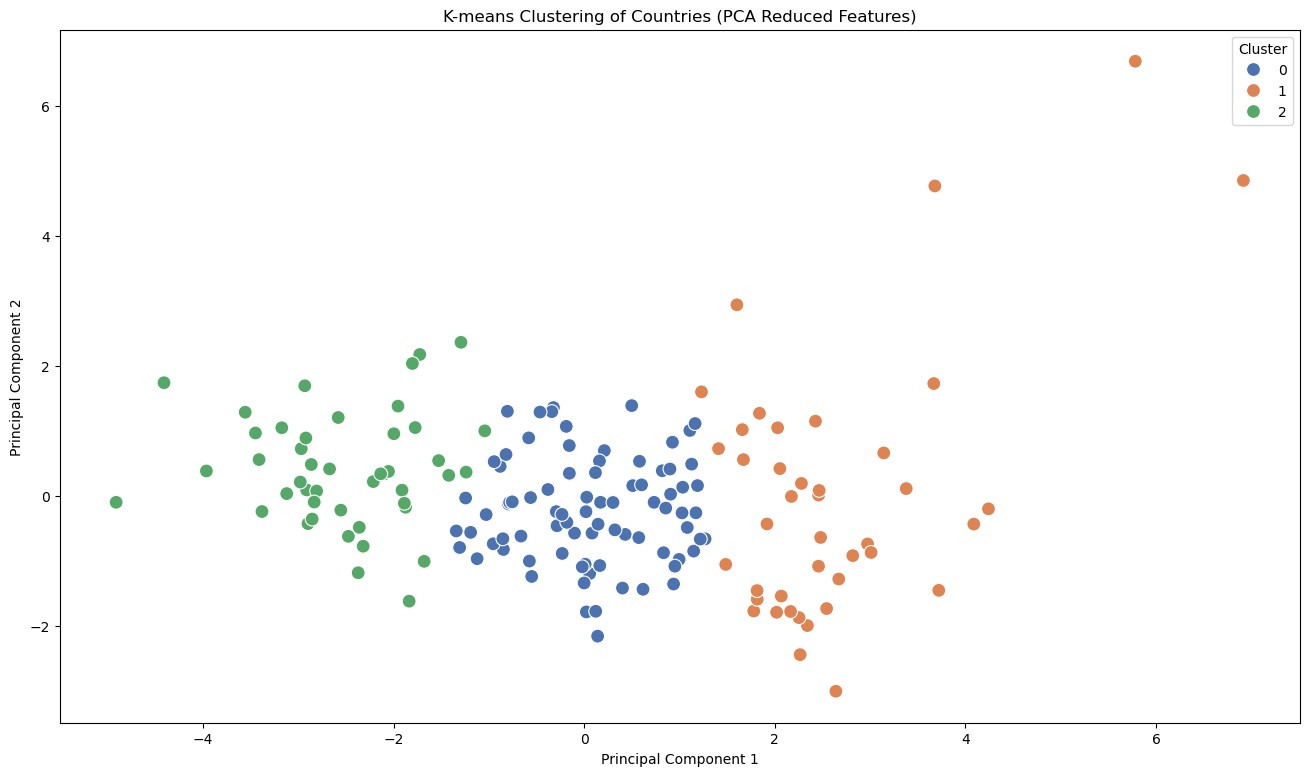

In [71]:
plt.figure()
sns.scatterplot(x='first', y='second', hue='cluster', data=df1, palette='deep', s=100)
# for i, country in enumerate(df1['country']):
#     plt.text(df1['first'][i] + 0.1, df1['second'][i], country, fontsize=9)
plt.title('K-means Clustering of Countries (PCA Reduced Features)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [73]:
cluster_summary = df[features].copy()
cluster_summary['cluster'] = pca_df['cluster']
cluster_means = cluster_summary.groupby('cluster').mean()
print("\nCluster Means:")
print(cluster_means)


Cluster Means:
         child_mort    exports    health    imports        income  inflation  \
cluster                                                                        
0         23.230864  38.136790  6.374938  45.791358  11856.172840   8.071556   
1          5.339024  61.402439  8.421220  54.758537  42726.829268   2.577439   
2         95.344444  27.969311  6.146222  41.699242   3355.844444  12.002111   

         life_expec  total_fer          gdpp  
cluster                                       
0         72.303704   2.378519   6202.888889  
1         79.419512   1.753415  38765.121951  
2         59.333333   5.061333   1626.888889  


In [75]:
inertia = []
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

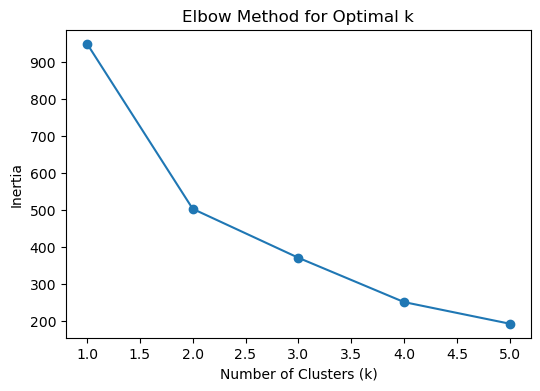

In [81]:
plt.figure(figsize=(6,4))
plt.plot(range(1, 6), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()